In [2]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#  Домашнее задание

### Задание 

#### Проведите вычислительные эксперимент - для заданной функции Растригина найдите среднее и минимальное
#### значение целевой функции по результатам 100 экспериментов, а также среднее число итераций при случайных
#### начальных условиях в диапазон [-5;5]. Эксперимент выполнить для размерностей d = 2 и 4.
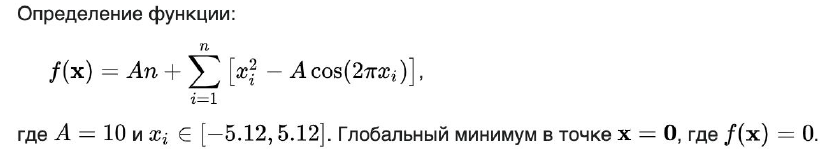
#### Результаты представьте в виде сводной таблицы.

In [138]:
def rastrigin(x):
    return 10.*len(x) + np.sum(x**2 - 10.*np.cos(2.*np.pi*x), axis=0)

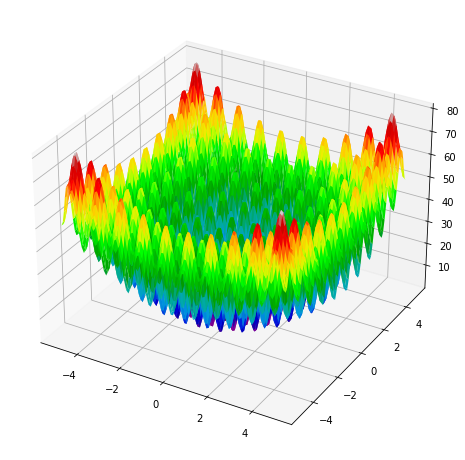

In [139]:
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y) 

Z = rastrigin(np.array([X,Y]))
 
fig = plt.figure(figsize=[8, 20])
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral)    

plt.show()

In [140]:
from scipy.optimize import minimize

In [141]:
x0=np.random.uniform(low=-5,high=5,size=(2,))

In [142]:
res = minimize(rastrigin, x0, method='Nelder-Mead', options={'xtol': 1e-8,'disp':True})
print(f'X -> {res.x}')


Optimization terminated successfully.
         Current function value: 1.989918
         Iterations: 66
         Function evaluations: 126
X -> [ 0.99495864 -0.99495864]


In [143]:
# dim = 2

In [144]:
itList = []
resList = []

for kk in range(100):
    x0=np.random.uniform(low=-5,high=5,size=(2,))
    res = minimize(rastrigin, x0, method='Nelder-Mead', options={'disp':False})
    
    itList.append(res.nit)
    resList.append(rastrigin(res.x))

In [145]:
np.mean(resList)

18.048445114676564

In [146]:
np.min(resList)

1.3713741608967212e-07

In [147]:
np.mean(itList).round()

32.0

In [122]:
# dim = 4

In [148]:
itList = []
resList = []

for kk in range(100):
    x0=np.random.uniform(low=-5,high=5,size=(4,))
    res = minimize(rastrigin, x0, method='Nelder-Mead', options={'disp':False})
    
    itList.append(res.nit)
    resList.append(rastrigin(res.x))

In [149]:
np.mean(resList)

35.38053522293375

In [150]:
np.min(resList)

1.989918861875232

In [151]:
np.mean(itList).round()

105.0

   -                                                |         d=2               |            d=4              |
--------------------------------------------------- | ------------------------- | --------------------------- |
Среднее значение целевой функции                    |   18.048445114676564      |    35.38053522293375        |
Минимальное найденное значение целевой функции      |  1.3713741608967212e-07   |    1.989918861875232        |
Среднее число итераций                              |           32              |            105              |